# **Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)
import os
import time
import re

In [ ]:
import pandas as pd

input_excel_file = 'news_share_data.xlsx'
output_csv_file = 'news_share_data.csv'

# Read the Excel file
df = pd.read_excel('news_share_data.xlsx')

# Save as CSV
df.to_csv('news_share_data.csv', index=False)

# **Load Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('news_share_data.csv')

df.head(5)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,...,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,...,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,...,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,...,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,...,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


In [ ]:
df.tail(5)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,2014-04-17,0.606557,6,2,0,4.913978,4,...,5709.823,4020.608,1950.0,0.493519,-0.119440,0.005376,0.021505,0.000000,0.000000,1300
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,2014-04-17,0.491018,4,2,0,4.674627,6,...,4352.491,2358.572,4200.0,0.455042,0.191196,0.053731,0.011940,0.000000,0.000000,1100
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,2014-04-17,0.634518,3,0,2,4.177665,9,...,6060.771,3296.052,3400.0,0.522917,0.009809,0.025381,0.045685,0.600000,-0.600000,4400
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,2014-04-17,0.447368,7,1,0,4.667961,8,...,4763.083,2709.129,0.0,0.494445,0.144969,0.069903,0.020388,0.833333,0.433333,1900
1002,7003062,Not in 'Twilight' Anymore: Robert Pattinson Ba...,Held at gunpoint after his brother abandoned h...,2014-04-17,0.480412,5,2,0,4.429126,5,...,3610.125,2717.930,1100.0,0.296896,0.082484,0.029126,0.023301,0.333333,0.250000,949


Text(0.5, 1.0, 'Average Token Length vs. Shares')

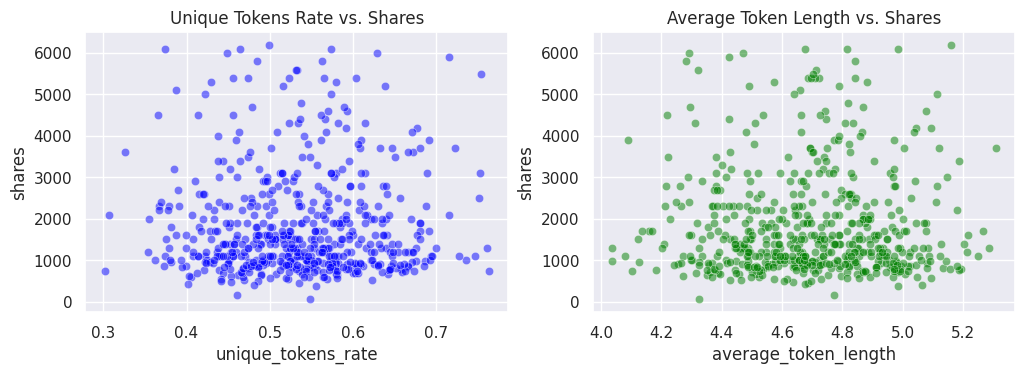

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Content Characteristics Analysis
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='unique_tokens_rate', y='shares', data=df, alpha=0.5, color='blue')
plt.title('Unique Tokens Rate vs. Shares')

plt.subplot(2, 2, 2)
sns.scatterplot(x='average_token_length', y='shares', data=df, alpha=0.5, color='green')
plt.title('Average Token Length vs. Shares')

Text(0.5, 1.0, 'Number of Images vs. Shares')

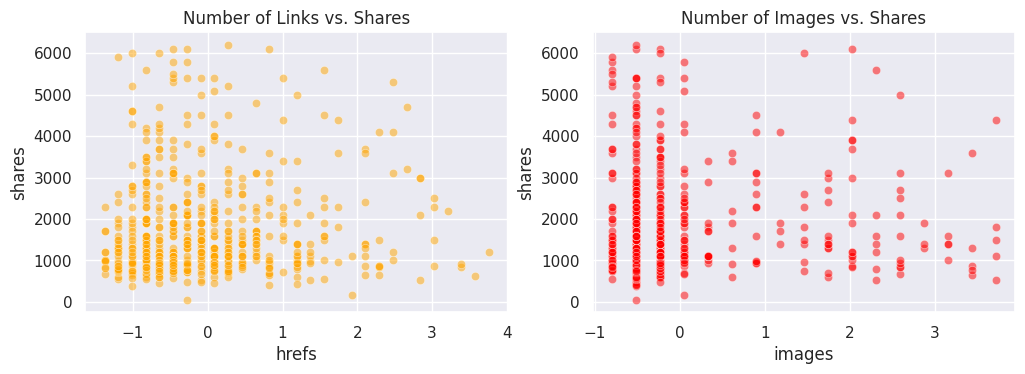

In [ ]:
# Article Metadata Analysis
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
sns.scatterplot(x='hrefs', y='shares', data=df, alpha=0.5, color='orange')
plt.title('Number of Links vs. Shares')

plt.subplot(2, 2, 4)
sns.scatterplot(x='images', y='shares', data=df, alpha=0.5, color='red')
plt.title('Number of Images vs. Shares')

Text(0.5, 1.0, 'Global Subjectivity vs. Shares')

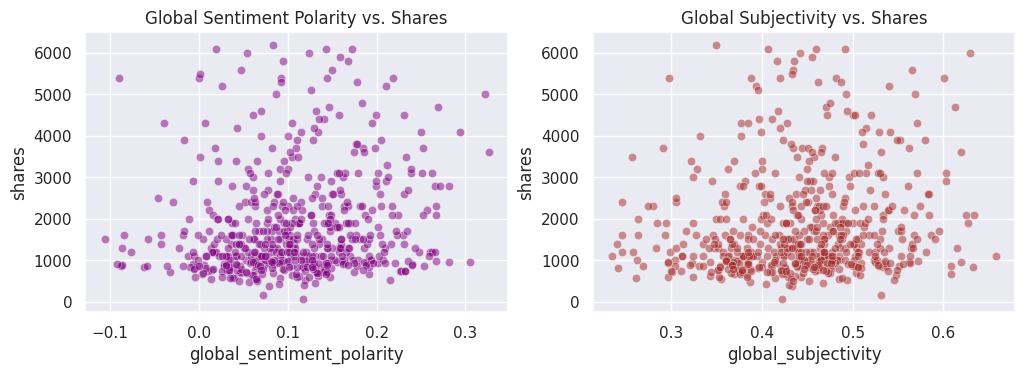

In [ ]:
# Sentiment and Subjectivity Analysis
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='global_sentiment_polarity', y='shares', data=df, alpha=0.5, color='purple')
plt.title('Global Sentiment Polarity vs. Shares')

plt.subplot(2, 2, 2)
sns.scatterplot(x='global_subjectivity', y='shares', data=df, alpha=0.5, color='brown')
plt.title('Global Subjectivity vs. Shares')

<ipython-input-39-3337d12bf37d>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='data_channel', y='shares', data=df, ci=None, palette='viridis')


Text(0.5, 1.0, 'Average Shares by Data Channel')

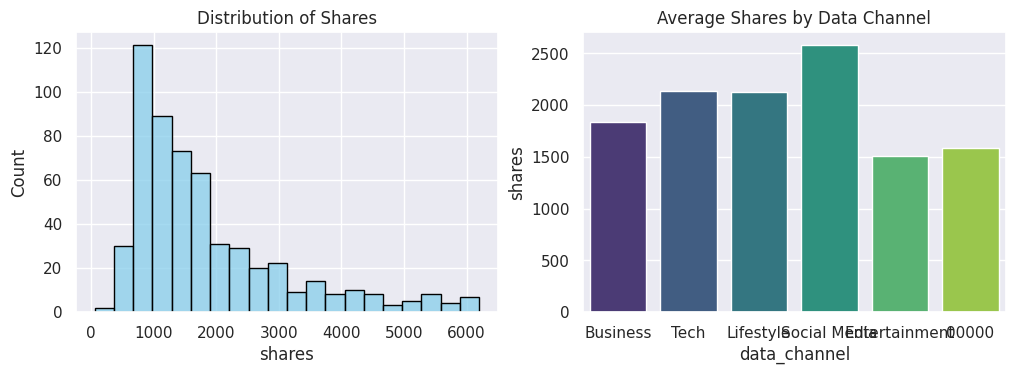

In [ ]:
# Social Engagement Analysis
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
sns.histplot(df['shares'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Shares')

plt.subplot(2, 2, 4)
sns.barplot(x='data_channel', y='shares', data=df, ci=None, palette='viridis')
plt.title('Average Shares by Data Channel')

Text(0.5, 1.0, 'Average Shares for Keywords vs. Shares')

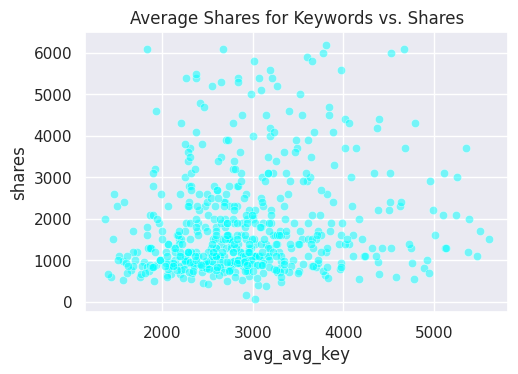

In [ ]:
# Keyword and Link Analysis
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='avg_avg_key', y='shares', data=df, alpha=0.5, color='cyan')
plt.title('Average Shares for Keywords vs. Shares')

Text(0.5, 1.0, 'Average Shares by Day of Week')

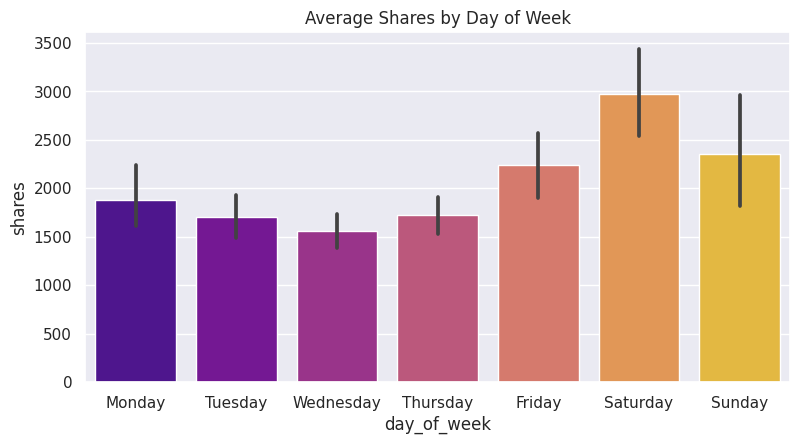

In [ ]:
# Temporal Analysis
df['published_date'] = pd.to_datetime(df['published_date'])
df['day_of_week'] = df['published_date'].dt.day_name()

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)
sns.barplot(x='day_of_week', y='shares', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='plasma')
plt.title('Average Shares by Day of Week')

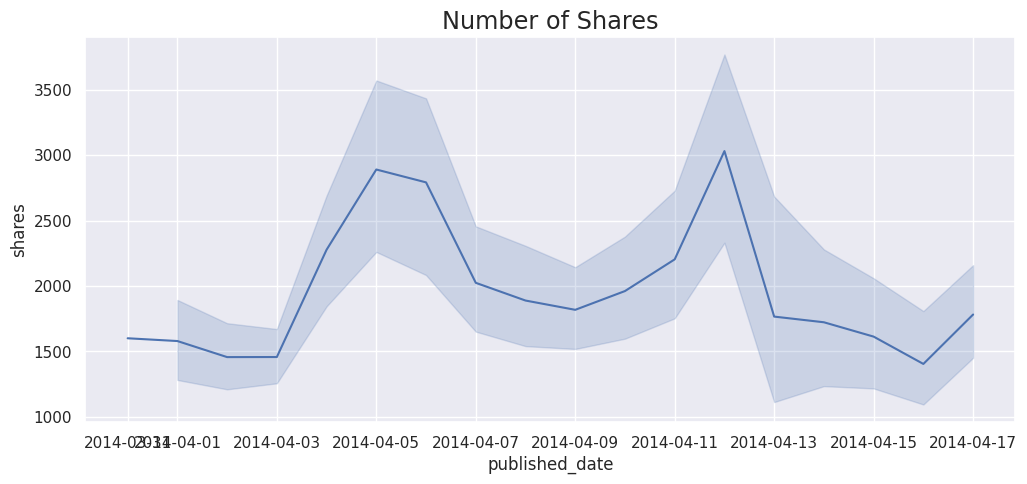

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='published_date', y='shares')
plt.title('Number of Shares', fontsize='x-large')
plt.show()

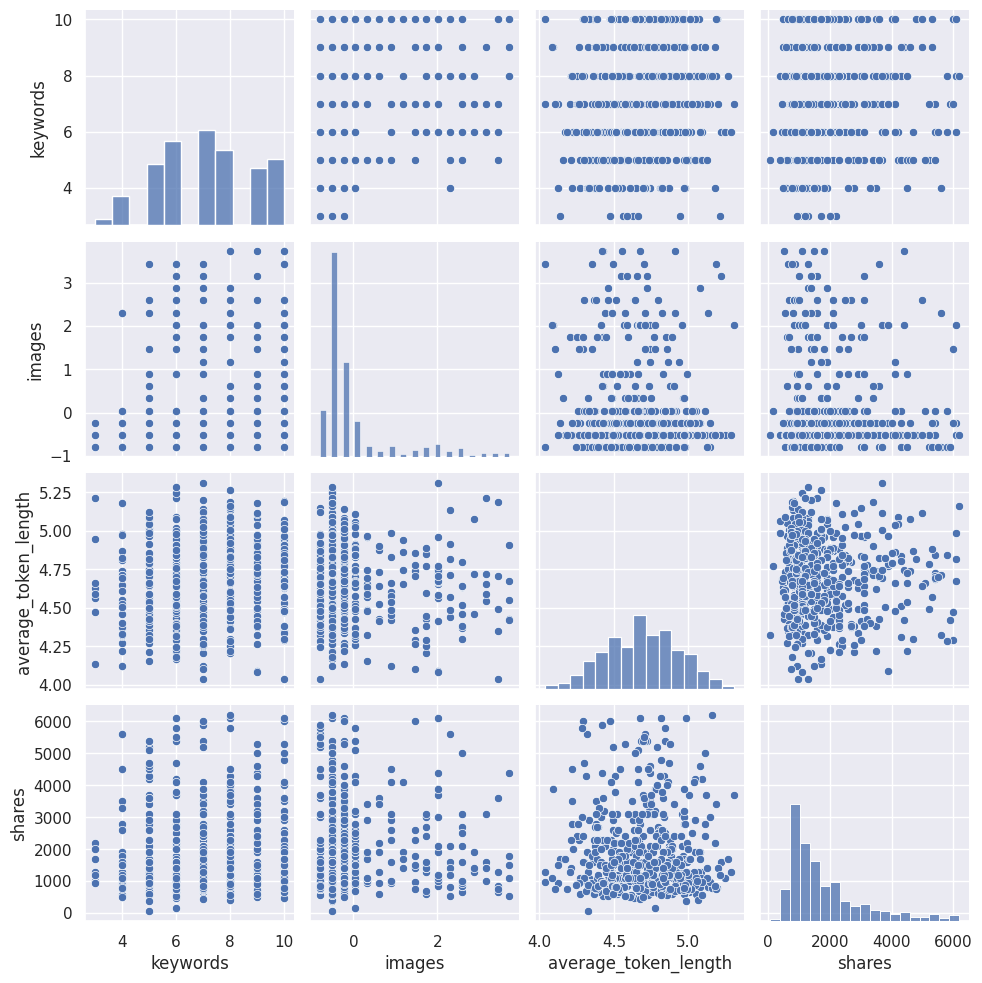

In [ ]:
# Scatter plot of some features vs. target variable ('shares')
sns.pairplot(df[['keywords', 'images', 'average_token_length', 'shares']])
plt.show()

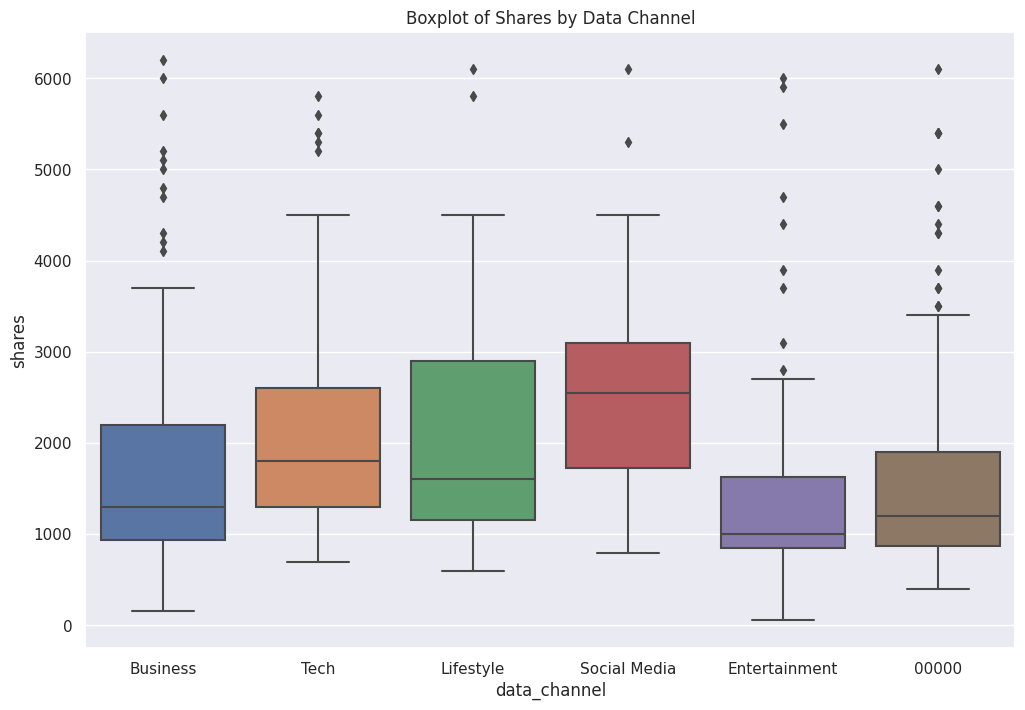

In [ ]:
# Boxplot of 'data_channel' vs. 'shares'
plt.figure(figsize=(12, 8))
sns.boxplot(x='data_channel', y='shares', data=df)
plt.title('Boxplot of Shares by Data Channel')
plt.show()